In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

print("Dependencies Imported")

Dependencies Imported


#Read Books Dataset

In [ ]:
books = pd.read_csv('drive/MyDrive/books_data/BX_Books.csv', sep=';', on_bad_lines='skip', encoding="latin-1")

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.shape

(271379, 8)

In [ ]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

#Drop Unwanted Columns

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L']]

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...


#Rename Columns

In [ ]:
books.rename(columns={
    "Book-Title": "title",
    "Book-Author": "author",
    "Year-Of-Publication": "year",
    "Publisher": "publisher",
    "Image-URL-L": "img_url",
    }, inplace=True)

<ipython-input-13-67129ca76001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={


In [ ]:
books.head()

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...


#Read Users Dataset

In [ ]:
users = pd.read_csv('drive/MyDrive/books_data/BX-Users.csv', sep=';', on_bad_lines='skip', encoding="latin-1")

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.shape

(278858, 3)

In [ ]:
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [ ]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#Read Ratings Dataset

In [ ]:
ratings = pd.read_csv('drive/MyDrive/books_data/BX-Book-Ratings.csv', sep=';', on_bad_lines='skip', encoding="latin-1")

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271379, 6)
(278858, 3)
(1149780, 3)


#Rename Ratings Columns

In [ ]:
ratings.rename(columns={
    "User-ID": "user_id",
    "Book-Rating": "rating",
    }, inplace=True)

In [ ]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape, users.shape, ratings.shape, sep='\n')

(271379, 6)
(278858, 3)
(1149780, 3)


In [ ]:
ratings['user_id'].value_counts()

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [ ]:
ratings['user_id'].value_counts().shape

(105283,)

In [ ]:
ratings['user_id'].unique().shape

(105283,)

In [ ]:
x = ratings['user_id'].value_counts() > 200

In [ ]:
x[x].shape

(899,)

In [ ]:
y = x[x].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]

In [ ]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
ratings.shape

(526356, 3)

In [ ]:
ratings_with_books = ratings.merge(books, on='ISBN')

In [ ]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [ ]:
ratings_with_books.shape

(487685, 8)

#Number of Ratings of Each Book

In [ ]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
number_rating.rename(columns={'rating': 'number_of_ratings'}, inplace=True)

In [ ]:
number_rating.head()

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
final_ratings = ratings_with_books.merge(number_rating, on='title')

In [ ]:
final_ratings.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [ ]:
final_ratings.shape

(61853, 9)

In [ ]:
final_ratings = final_ratings[final_ratings['number_of_ratings'] >= 50]

In [ ]:
final_ratings.sample(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,number_of_ratings
29692,208671,0380002930,0,Watership Down,Richard Adams,1976,Avon,http://images.amazon.com/images/P/0380002930.0...,115
100547,234623,0399149155,0,Q Is for Quarry,Sue Grafton,2002,Putnam Publishing Group,http://images.amazon.com/images/P/0399149155.0...,88
86007,6242,1573228214,6,High Fidelity,Nick Hornby,2000,Riverhead Books,http://images.amazon.com/images/P/1573228214.0...,62
83210,143792,0743431030,0,Mother of Pearl,Melinda Haynes,2001,Pocket,http://images.amazon.com/images/P/0743431030.0...,54
192204,198711,0451160916,0,The Shining,Stephen King,1997,Signet Book,http://images.amazon.com/images/P/0451160916.0...,50


In [ ]:
final_ratings.shape

(61853, 9)

In [ ]:
final_ratings.drop_duplicates(['user_id', 'title'], inplace=True)

In [ ]:
final_ratings.shape

(59850, 9)

In [ ]:
final_ratings

,user_id,ISBN,rating,title,author,year,publisher,img_url,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [ ]:
book_pivot = final_ratings.pivot_table(columns='user_id', index='title', values='rating')

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.shape

(742, 888)

In [ ]:
book_pivot.fillna(0, inplace=True)

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Data Visualization

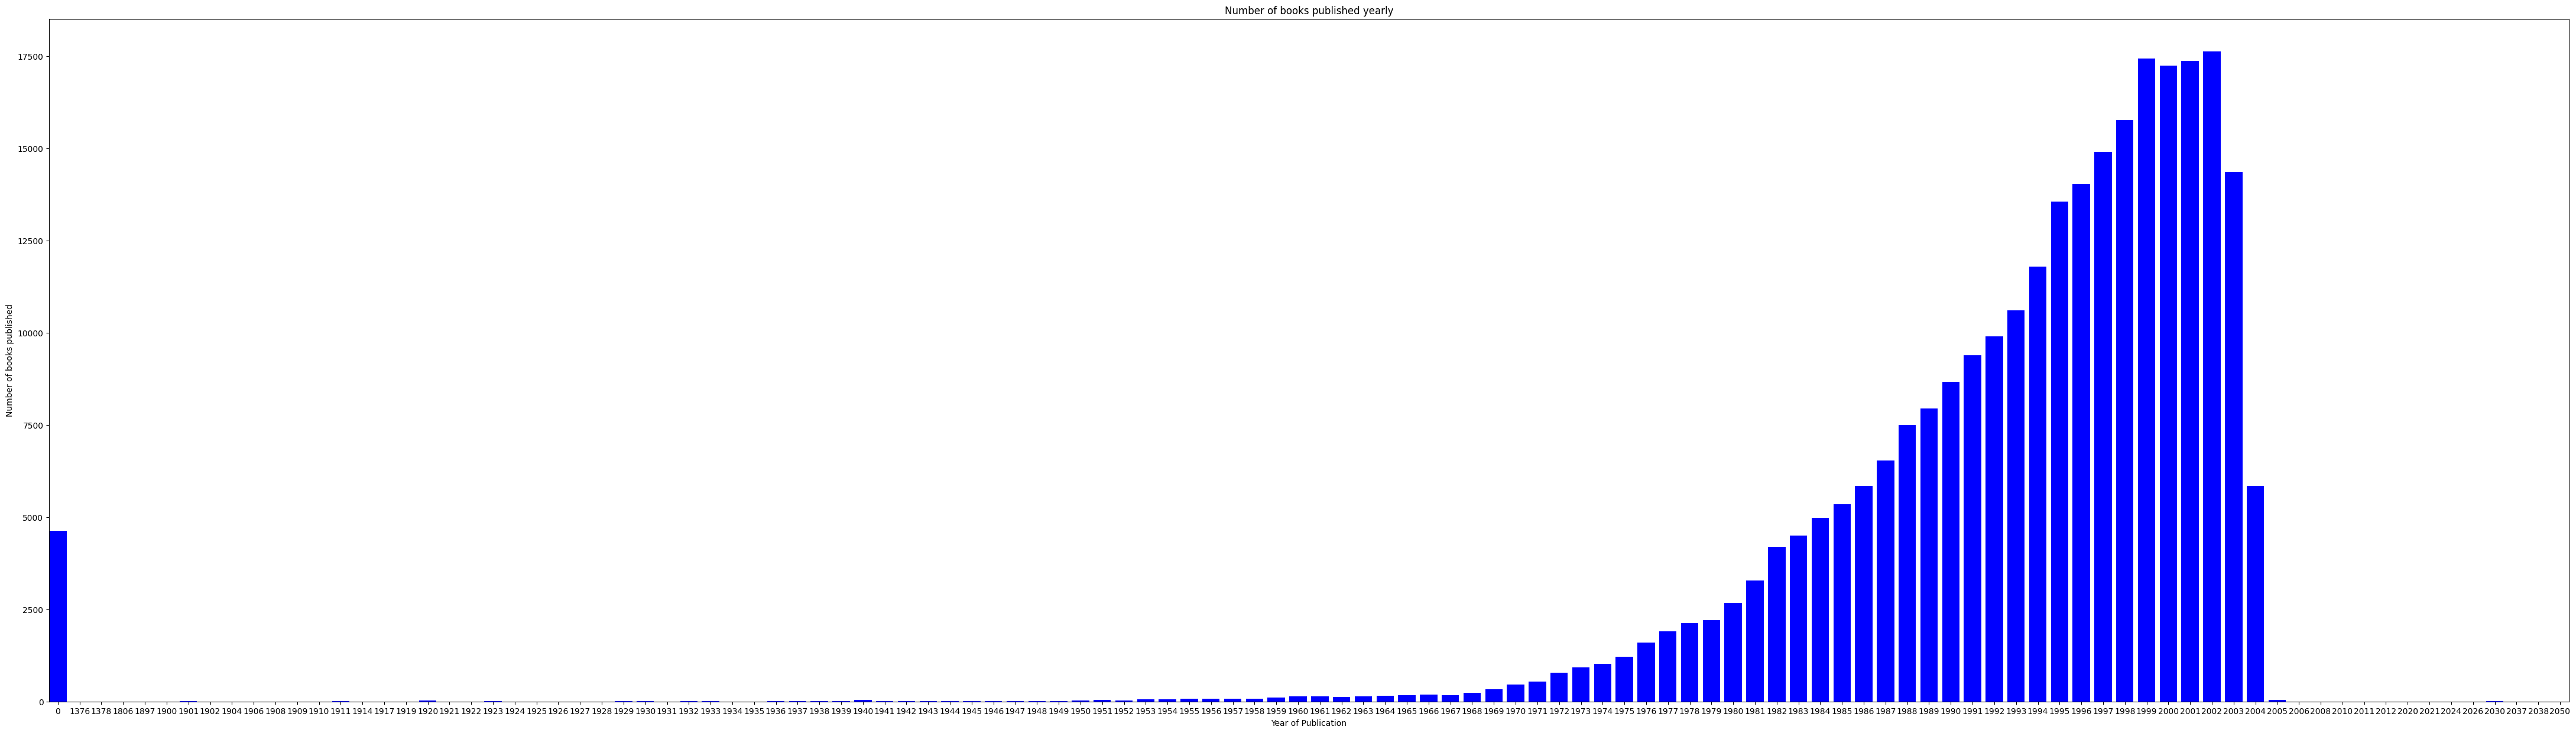

In [ ]:
publications = {}
for year in books['year']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

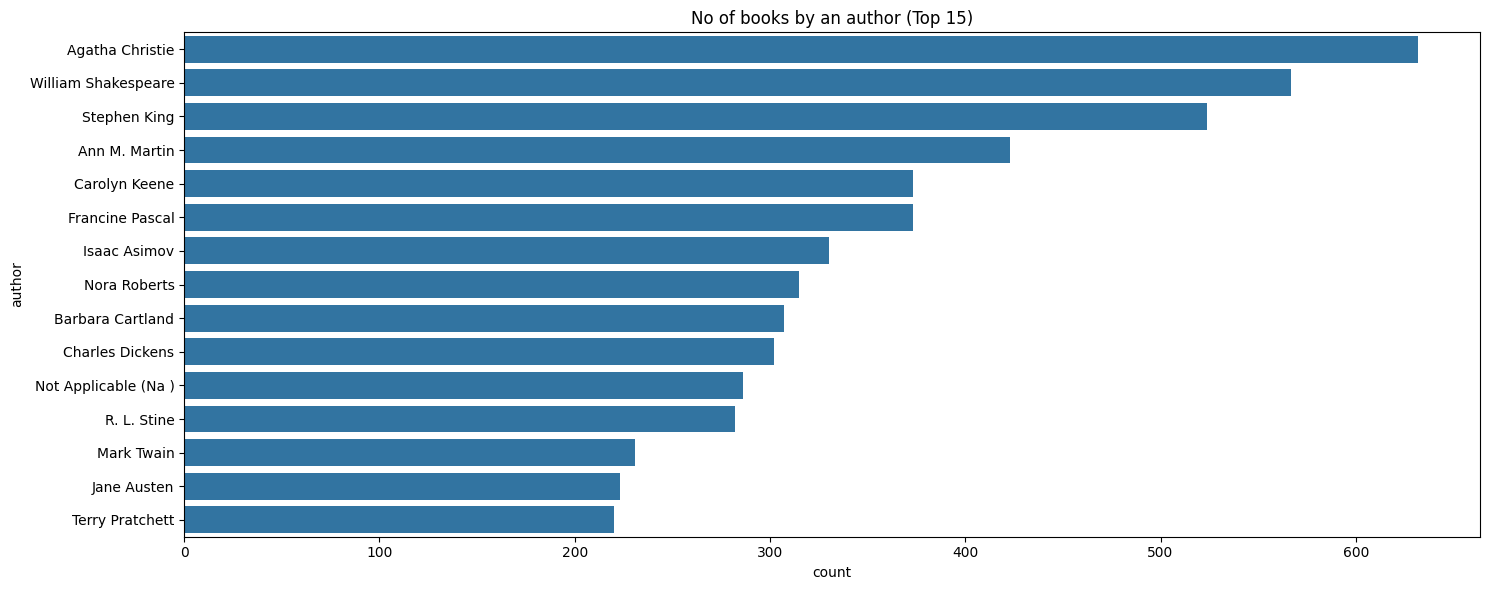

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(y="author", data=books, order=books['author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")
plt.tight_layout()
plt.savefig('books_by_author.png')
plt.show()

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

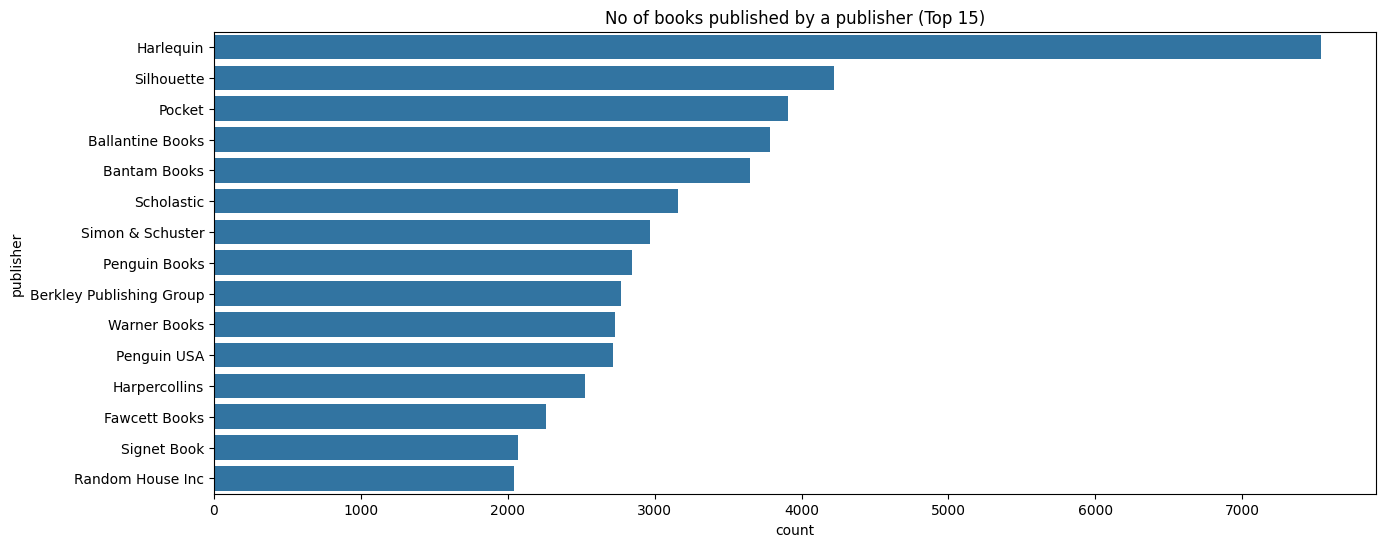

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(y="publisher", data=books,order=books['publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

<Axes: xlabel='rating', ylabel='count'>

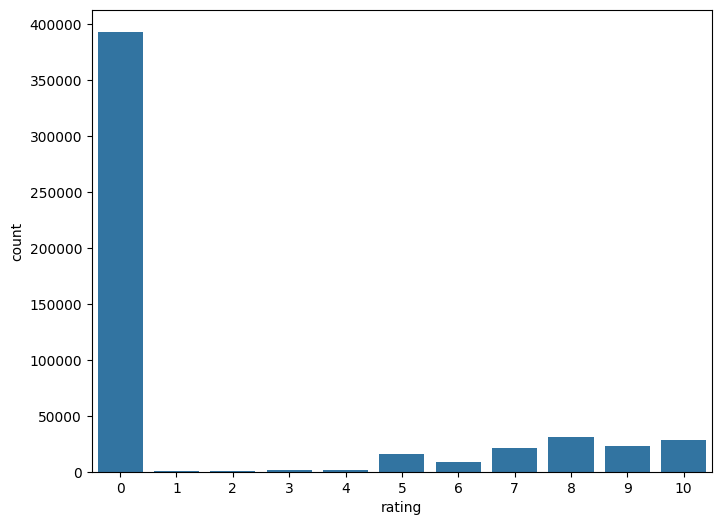

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", data=ratings)

<ipython-input-96-f8ef4fea20e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_ratings', y='title', data=top_books_df, palette='viridis')


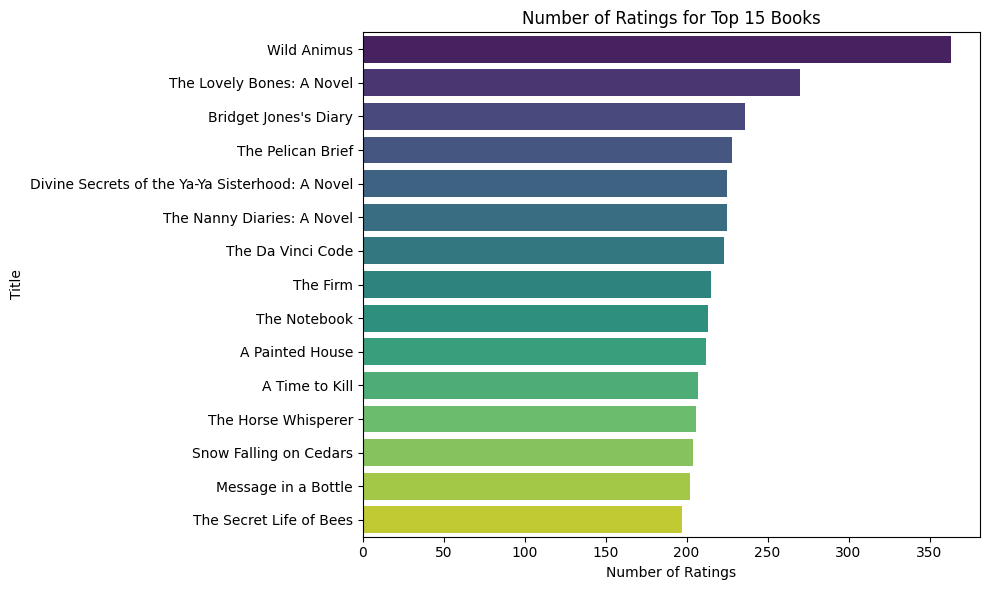

In [ ]:
# Calculate the number of ratings for each book
top_books = final_ratings['title'].value_counts().head(15)
top_books_df = top_books.reset_index()
top_books_df.columns = ['title', 'number_of_ratings']

plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_ratings', y='title', data=top_books_df, palette='viridis')
plt.title('Number of Ratings for Top 15 Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Title')
plt.tight_layout()
plt.savefig('ratings_top_books.png')
plt.show()


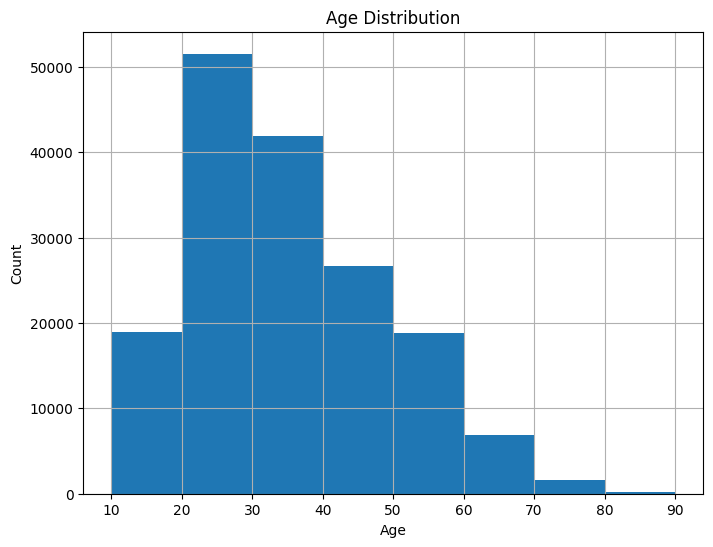

In [ ]:
plt.figure(figsize=(8,6))
users.age.hist(bins=[10*i for i in range(1, 10)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

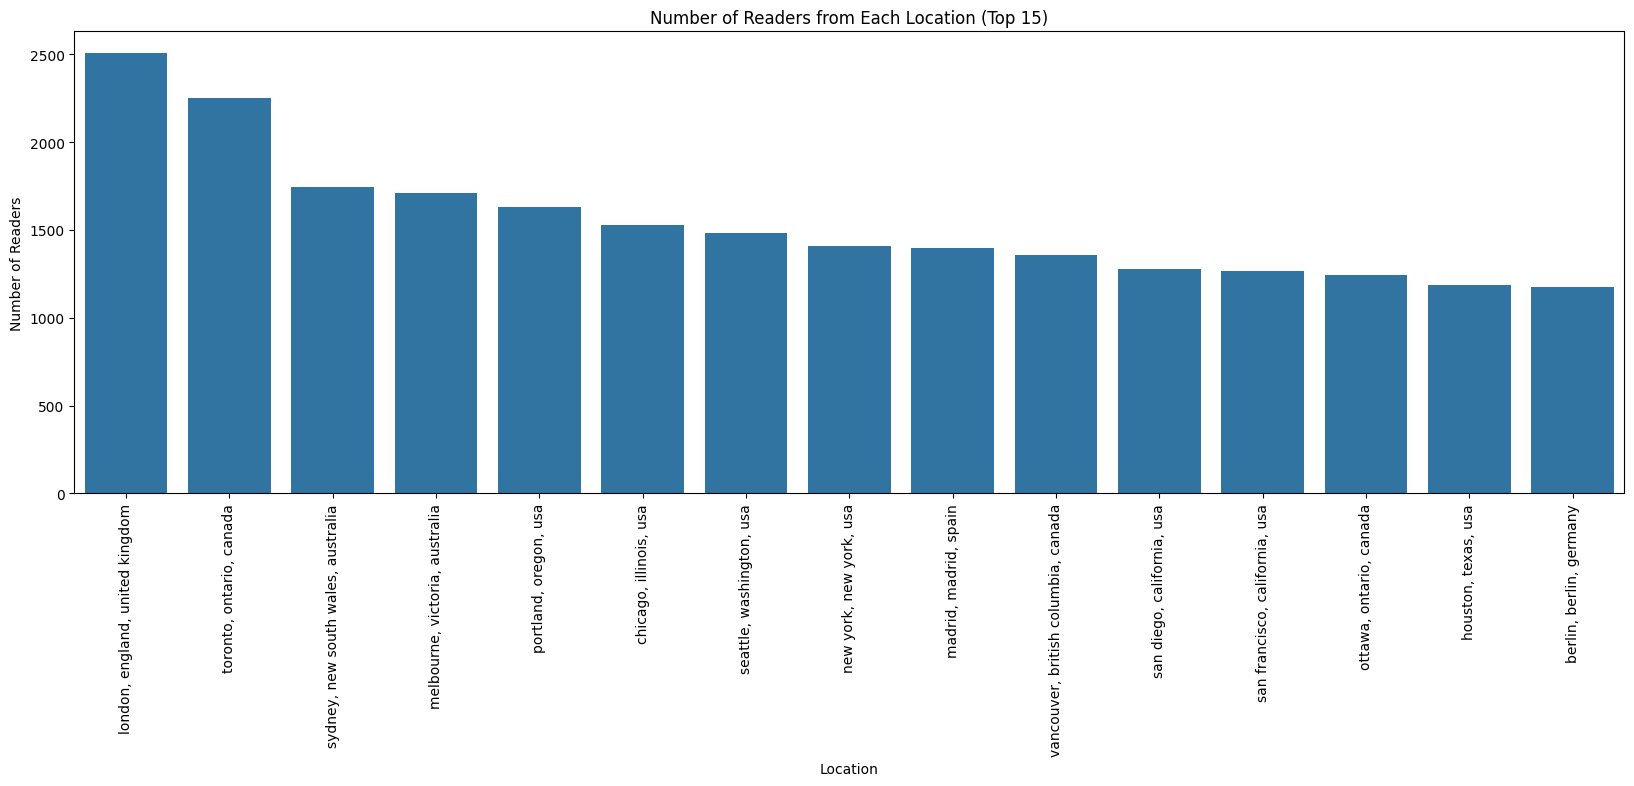

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="location", data=users, order=users['location'].value_counts().index[0:15])
plt.title("Number of Readers from Each Location (Top 15)")

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Number of Readers")
plt.show()


#Model Building

In [ ]:
book_sparse = csr_matrix(book_pivot)

In [ ]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [ ]:
model = NearestNeighbors(algorithm='brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1), n_neighbors=6)

In [ ]:
distances

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [ ]:
suggestions

array([[237, 240, 238, 241, 184, 536]])

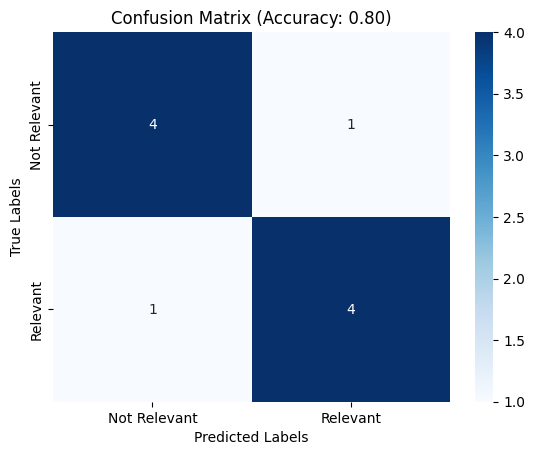

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Actual labels (1 for relevant, 0 for not relevant)
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

# Example: Predicted labels (1 for relevant, 0 for not relevant)
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [ ]:
book_pivot.index[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [ ]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [ ]:
books_name = book_pivot.index

#Find URL

In [ ]:
ids = np.where(final_ratings['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [ ]:
final_ratings.iloc[ids]['img_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [ ]:
book_name = []
for book_id in suggestions:
    book_name.append(book_pivot.index[book_id])

In [ ]:
book_name[0]

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')

In [ ]:
ids_index = []
for name in book_name[0]:
    ids = np.where(final_ratings['title'] == name)[0][0]
    ids_index.append(ids)

In [ ]:
for idx in ids_index:
    url = final_ratings.iloc[idx]['img_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


#Save Pickle Files into the GoogleDrive

In [ ]:
pickle.dump(model, open('drive/MyDrive/books_artifacts/model.pkl', 'wb'))
pickle.dump(books_name, open('drive/MyDrive/books_artifacts/books_name.pkl', 'wb'))
pickle.dump(final_ratings, open('drive/MyDrive/books_artifacts/final_ratings.pkl', 'wb'))
pickle.dump(book_pivot, open('drive/MyDrive/books_artifacts/book_pivot.pkl', 'wb'))
#

#Recommendation System

In [ ]:
def recommend_book(book_name, num_recommendations):
    try:
        book_id = np.where(book_pivot.index == book_name)[0][0]
        distances, suggestions = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=num_recommendations+1)

        print(f"The suggestions for '{book_name}' are:")
        for i in range(1, len(suggestions[0])):
            print(book_pivot.index[suggestions[0][i]])
    except IndexError:
        print(f"'{book_name}' not found in the database.")
    except Exception as e:
        print(f"An error occurred: {e}")

bookName = input("Enter a book name: ")
num_recommendations = int(input("Enter the number of books to recommend: "))
recommend_book(bookName, num_recommendations)


Enter a book name: 1984
Enter the number of books to recommend: 5
The suggestions for '1984' are:
No Safe Place
A Civil Action
Foucault's Pendulum
Long After Midnight
Abduction


In [ ]:
def load_pickle_file(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def recommend_book(book_name, num_recommendations):
    try:
        # Load the book pivot table and the trained model from pickle files
        book_pivot = load_pickle_file('drive/MyDrive/books_artifacts/book_pivot.pkl')
        model = load_pickle_file('drive/MyDrive/books_artifacts/model.pkl')

        book_id = np.where(book_pivot.index == book_name)[0][0]
        distances, suggestions = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=num_recommendations+1)

        print(f"The suggestions for '{book_name}' are:")
        for i in range(1, len(suggestions[0])):
            print(book_pivot.index[suggestions[0][i]])
    except IndexError:
        print(f"'{book_name}' not found in the database.")
    except FileNotFoundError:
        print("Error: One or more required pickle files not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Main execution
if __name__ == "__main__":
    bookName = input("Enter a book name: ")
    num_recommendations = int(input("Enter the number of books to recommend: "))
    recommend_book(bookName, num_recommendations)

Enter a book name: 2nd Chance
Enter the number of books to recommend: 5
The suggestions for '2nd Chance' are:
The Next Accident
Exclusive
The Ghost
Unspeakable
Last Man Standing
